In [1]:
import numpy as np
from results_L_4_1 import results as results_4 
from results_L_5_550000_1 import results as results_5
from results_L_6_1 import results as results_6
from results_L_7_1 import results as results_7
from results_L_8_N_131 import results as results_8_131

from results_L_8_1600_N_129 import results as results_8_129

from matplotlib.pyplot import *

In [2]:
results = [results_4, results_5, results_6, results_7, results_8_129]
N = [15,21,33,66,129]
maxiter = [450_000, 550_000, 45_000, 13_000, 1_600]
first_L = 4

13000


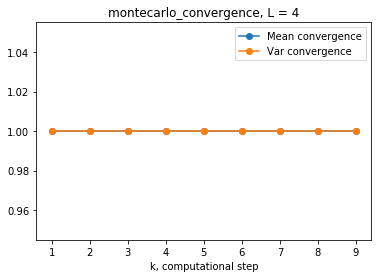

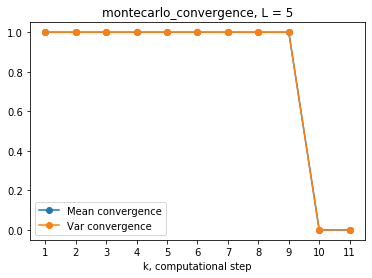

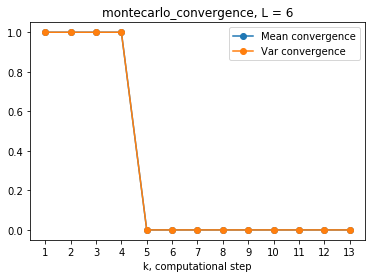

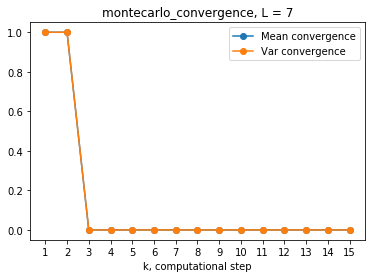

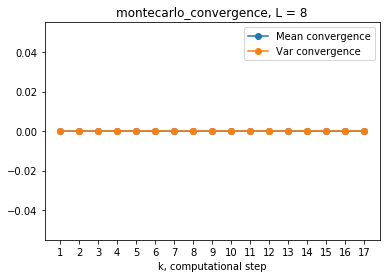

In [3]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [interesting[k][0][0] for k in range(len(interesting))], "-o", label="Mean convergence")
    plot(x, [interesting[k][0][1] for k in range(len(interesting))], "-o", label="Var convergence")
    legend()
    xlabel('k, computational step')
    title('montecarlo_convergence, L = ' + str(i+first_L))
    xticks(x)
    show()

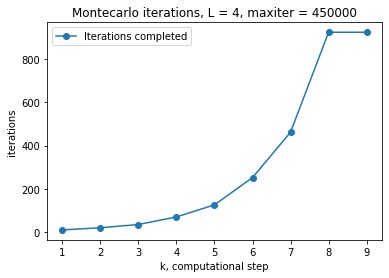

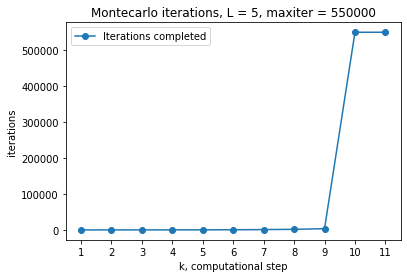

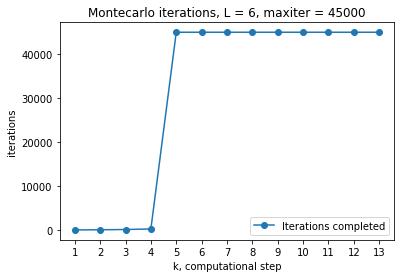

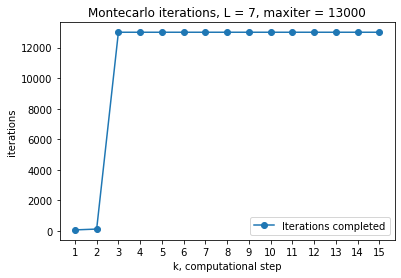

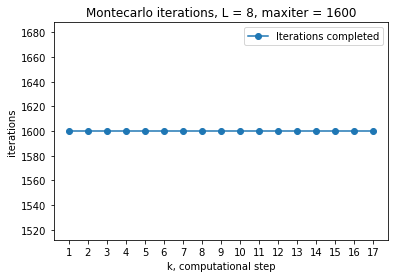

In [4]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [len(interesting[k][1]) for k in range(len(interesting))], "-o", label="Iterations completed")
    legend()
    xlabel('k, computational step')
    ylabel('iterations')
    title('Montecarlo iterations, L = '+ str(i+first_L)+ ', maxiter = ' + str(maxiter[i]))
    xticks(x)
    #savefig("iteration_montecarlo_convergence_L="+str(i+5), dpi=300)    
    show()

## Estimate convergence

/home/simone/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/simone/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'log2(iterations)')

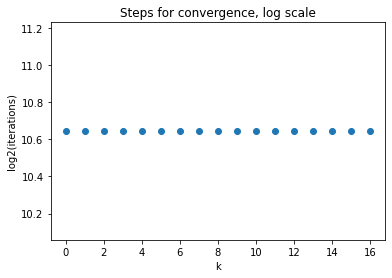

In [3]:
L = 8
first_L = 4
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = -1


log_iter = np.log2([len(results[L-first_L][k][1]) for k in range(len(results[L-first_L]))])
plot(range(len(log_iter)), log_iter, 'o')
m = np.mean(np.diff(log_iter[:first_non_convergence]))
q = log_iter[0]
x = np.array(range(max_k))
plot(x, m * x + q)
title("Steps for convergence, log scale")
xlabel("k")
ylabel("log2(iterations)")
#savefig("iterations_convergence_L_5.png", dpi=300)
#print(2 **(m * 10 + q))

## DISTRIBUTIONS PLOT

0


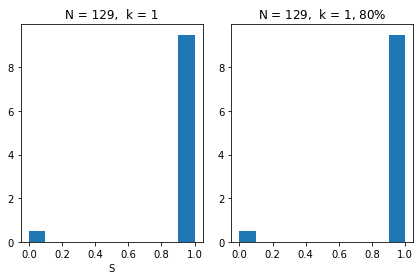

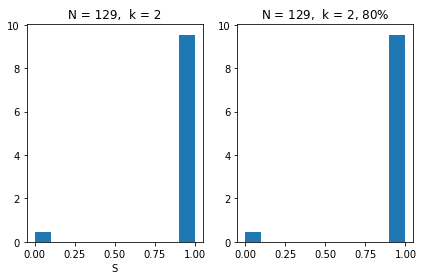

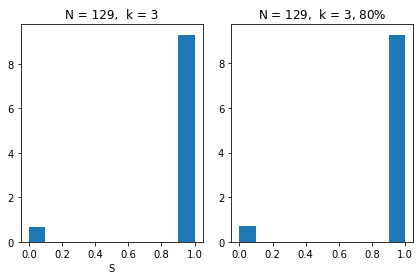

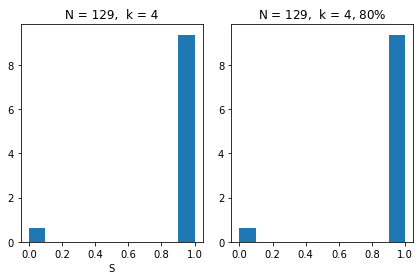

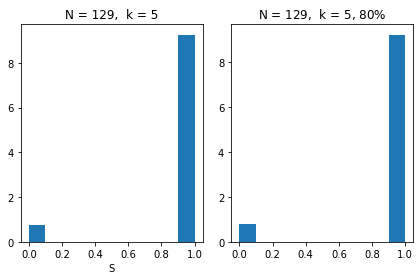

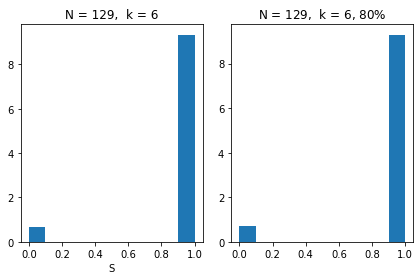

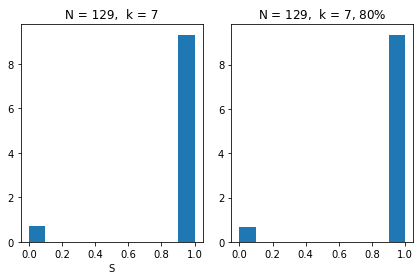

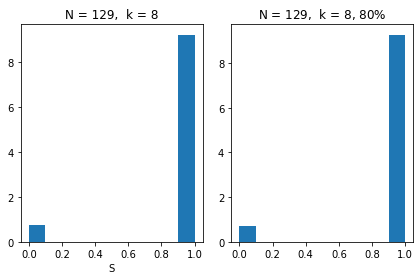

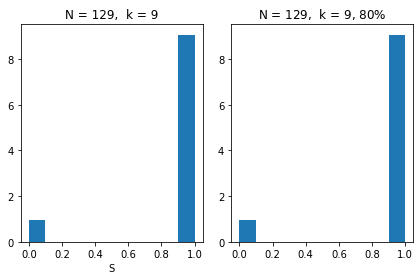

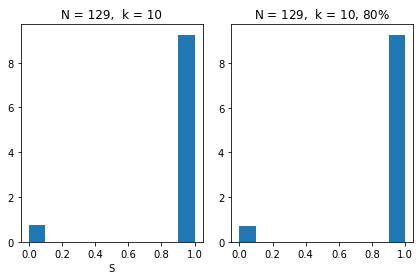

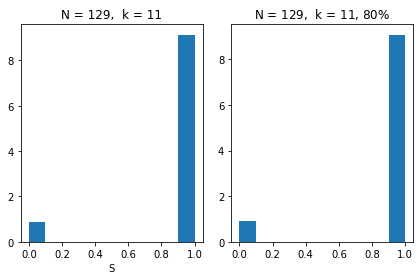

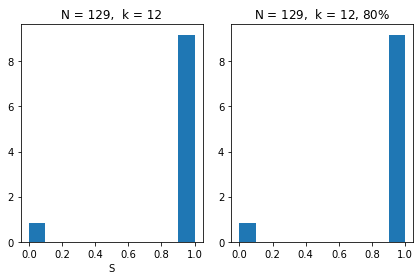

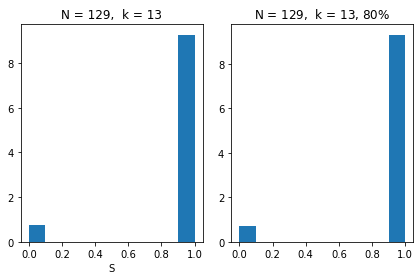

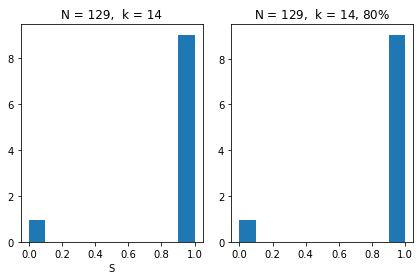

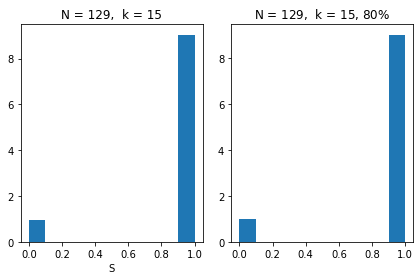

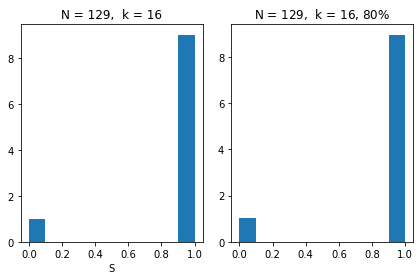

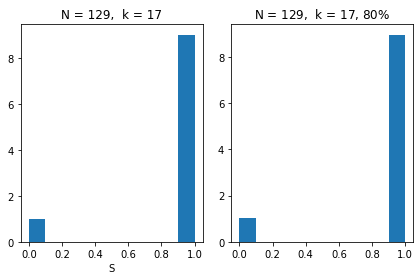

In [43]:
from matplotlib import pyplot as plt
L = 8
first_L = 4
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

print(first_non_convergence)
#number of figures with 2 computational steps, 0
number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence
partial_idx = maxiter[L-first_L] // 5
    
# 2 computational steps plot
#plot converged steps
for i in range(number_of_complete_figures):
    fig, axes = plt.subplots(1,2)
    for j,ax in enumerate(axes.flatten()):
        k = 2 * i +j
        ax.hist(results[L-first_L][k][1], density=True)
        ax.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) )
        ax.set_xlabel("S")

    plt.tight_layout()
    #plt.savefig('partial_L_' + str(L) + "_" + str(i+1), dpi=300)
    plt.show()

    #last of the converged, makes it odd
if not even:
    k = first_non_convergence - 1
    plt.hist(results[L-first_L][k][1], density=True)
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) )
    plt.xlabel("S")

    plt.tight_layout()
    #plt.savefig('partial_L_' + str(L) + "_" + str(i+2), dpi=300)
    plt.show()
    
# plot non converged
for k in range(first_non_convergence, max_k):
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.hist(results[L-first_L][k][1], density=True)
    ax1.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    ax1.set_xlabel("S")
    ax2.hist(results[L-first_L][k][1][:-partial_idx], density=True)
    ax2.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) +", 80$\%$" )
    plt.tight_layout()
    #plt.savefig()
    plt.show()